In [2]:
#KMeans Clustering

# Import the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# Allows chart to be displayed in the notebook
%matplotlib inline

In [3]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\Lawal Ibraheem\Desktop\Machine Learning\pandas_exercises-master\pandas_exercises-master\05_Merge\Auto_MPG\cars2.csv")
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


In [4]:
dataset["car"] = dataset["car"].str.split(" ", n=1, expand=True)[0]

In [5]:
for column  in dataset.columns[:-1]:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

In [6]:
X = dataset[dataset.columns[:-1]]
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,33.0,4,91,53.0,1795,17.4,76,3
1,20.0,6,225,100.0,3651,17.7,76,1
2,18.0,6,250,78.0,3574,21.0,76,1
3,18.5,6,250,110.0,3645,16.2,76,1
4,17.5,6,258,95.0,3193,17.8,76,1


In [7]:
# Eliminating the mssing values in the dataset
for i in X.columns:
    X[i] = X[i].fillna(X[i].mean())
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0
0


Text(0, 0.5, 'WCSS')

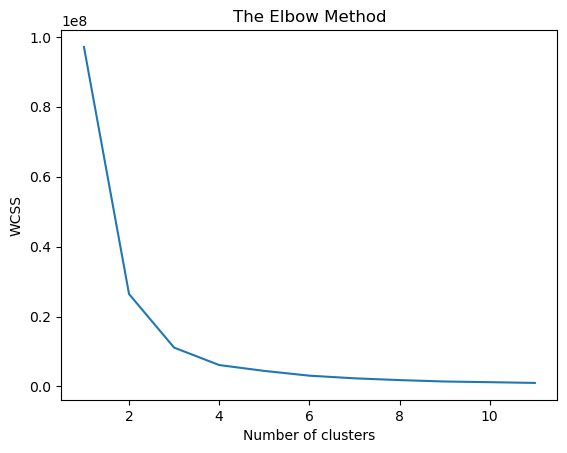

In [8]:
#Using the elnow method to get the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, 
                    n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [9]:
#Applying KMeans to the dataset

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.values

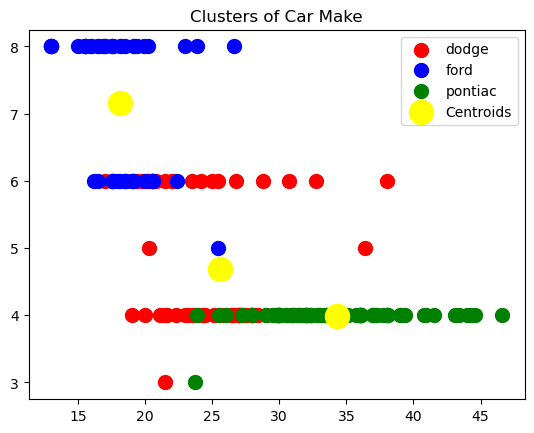

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='dodge')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='ford')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='pontiac')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Car Make')
plt.legend()

In [11]:
str(dataset.car.unique()[1])

'dodge'